In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('monatszahlen2307_verkehrsunfaelle_10_07_23_nosum.csv')
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT,VORJAHRESWERT,VERAEND_VORMONAT_PROZENT,VERAEND_VORJAHRESMONAT_PROZENT,ZWOELF_MONATE_MITTELWERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN,NaN,NaN,NaN,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN,NaN,NaN,NaN,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN,NaN,NaN,NaN,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN,NaN,NaN,NaN,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2011,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0,NaN,-13.04,NaN,584.0
2012,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0,NaN,4.33,NaN,594.0
2013,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0,NaN,-8.89,NaN,596.0
2014,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0,NaN,-6.02,NaN,594.0


In [3]:
# df.head(50)
# df.tail(10)
# display(df)
# df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2016 entries, 0 to 2015
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   MONATSZAHL                      2016 non-null   object 
 1   AUSPRAEGUNG                     2016 non-null   object 
 2   JAHR                            2016 non-null   int64  
 3   MONAT                           2016 non-null   int64  
 4   WERT                            1848 non-null   float64
 5   VORJAHRESWERT                   1848 non-null   float64
 6   VERAEND_VORMONAT_PROZENT        1840 non-null   float64
 7   VERAEND_VORJAHRESMONAT_PROZENT  1763 non-null   float64
 8   ZWOELF_MONATE_MITTELWERT        1848 non-null   float64
dtypes: float64(5), int64(2), object(2)
memory usage: 141.9+ KB


In [4]:
# select only the first 5 relevant columns: 'MONATSZAHL' (category), 'AUSPRAEGUNG' (accident-type), 'JAHR', 'MONAT', 'WERT'
df = df[['MONATSZAHL', 'AUSPRAEGUNG', 'JAHR', 'MONAT', 'WERT']]
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2023,202301,NaN
1,Alkoholunfälle,insgesamt,2023,202302,NaN
2,Alkoholunfälle,insgesamt,2023,202303,NaN
3,Alkoholunfälle,insgesamt,2023,202304,NaN
4,Alkoholunfälle,insgesamt,2023,202305,NaN
...,...,...,...,...,...
2011,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
2012,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
2013,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
2014,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [5]:
# drop the records which come after 2020
df = df[df['JAHR'] <= 2020]
df.reset_index(drop=True, inplace=True)
df

,MONATSZAHL,AUSPRAEGUNG,JAHR,MONAT,WERT
0,Alkoholunfälle,insgesamt,2020,202001,28.0
1,Alkoholunfälle,insgesamt,2020,202002,40.0
2,Alkoholunfälle,insgesamt,2020,202003,27.0
3,Alkoholunfälle,insgesamt,2020,202004,26.0
4,Alkoholunfälle,insgesamt,2020,202005,40.0
...,...,...,...,...,...
1759,Verkehrsunfälle,Verletzte und Getötete,2000,200008,647.0
1760,Verkehrsunfälle,Verletzte und Getötete,2000,200009,675.0
1761,Verkehrsunfälle,Verletzte und Getötete,2000,200010,615.0
1762,Verkehrsunfälle,Verletzte und Getötete,2000,200011,578.0


In [6]:
df.info()
# df_filtered.dropna(inplace=True) -> no NULL values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1764 non-null   object 
 1   AUSPRAEGUNG  1764 non-null   object 
 2   JAHR         1764 non-null   int64  
 3   MONAT        1764 non-null   int64  
 4   WERT         1764 non-null   float64
dtypes: float64(1), int64(2), object(2)
memory usage: 69.0+ KB


In [7]:
df['MONATSZAHL'] = df['MONATSZAHL'].astype("string")
df['AUSPRAEGUNG'] = df['AUSPRAEGUNG'].astype("string")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1764 entries, 0 to 1763
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MONATSZAHL   1764 non-null   string 
 1   AUSPRAEGUNG  1764 non-null   string 
 2   JAHR         1764 non-null   int64  
 3   MONAT        1764 non-null   int64  
 4   WERT         1764 non-null   float64
dtypes: float64(1), int64(2), string(2)
memory usage: 69.0 KB


/var/folders/mv/q7zzt95s3bjbxyj60fgc67lh0000gn/T/ipykernel_32471/1663091395.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['MONATSZAHL'] = df['MONATSZAHL'].astype("string")
/var/folders/mv/q7zzt95s3bjbxyj60fgc67lh0000gn/T/ipykernel_32471/1663091395.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['AUSPRAEGUNG'] = df['AUSPRAEGUNG'].astype("string")


In [9]:
auspraegung_values = df["AUSPRAEGUNG"].unique()
print(auspraegung_values)
# AUSPRAEGUNG = 'insgesamt' -> total for all subcategories

monatszahl_values = df["MONATSZAHL"].unique()
print(monatszahl_values)

<StringArray>
['insgesamt', 'Verletzte und Getötete', 'mit Personenschäden']
Length: 3, dtype: string
<StringArray>
['Alkoholunfälle', 'Fluchtunfälle', 'Verkehrsunfälle']
Length: 3, dtype: string


array([[<AxesSubplot:title={'center':'JAHR'}>,
        <AxesSubplot:title={'center':'MONAT'}>],
       [<AxesSubplot:title={'center':'WERT'}>, <AxesSubplot:>]],
      dtype=object)

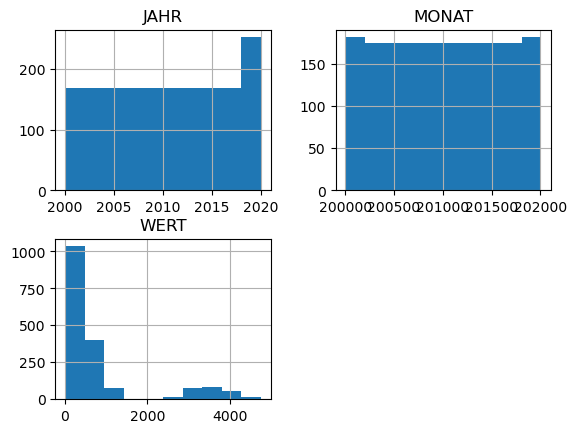

In [10]:
# df.hist()

In [ ]:
# Task 1: visualise historically the number of accidents per category (column1: MONATSZAHL)
# Task 2: create an application that forecasts the values for Category: 'Alkoholunfälle', Type: 'insgesamt', Year: '2021' and Month: '01'